#### Multiprocessing training example for ffnet

In [27]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  9 10:17:25 2015
"""

from ffnet import ffnet, mlgraph
from scipy import rand

# Generate random training data (large)
n_input = 64
input = rand(10000, n_input)
target = rand(10000, 1)

# Define net (large one)
conec = mlgraph((n_input, 300, 100, 20, 10, 1))
net = ffnet(conec)

# Test training speed-up
# Note that the below *if* is necessary only on Windows
if __name__ == '__main__':
    from time import time
    from multiprocessing import cpu_count

    # Preserve original weights
    weights0 = net.weights.copy()

    print "TRAINING, this can take a while..."
    n_list = []
    t_list = []
    for n in range(1, cpu_count()+1):
        net.weights[:] = weights0  # Start always from the same point
        t0 = time()
        net.train_tnc(input, target, nproc=n, maxfun=50, messages=0)
        t1 = time()
        print '%s processes: %s s' % (n, t1 - t0)
        n_list.append(int(n))
        t_list.append(t1 - t0)

TRAINING, this can take a while...
1 processes: 250.05835104 s
2 processes: 138.535722971 s
3 processes: 143.474802971 s
4 processes: 139.9558568 s


#### Make some plots

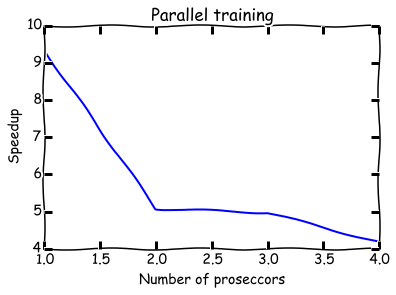

In [18]:
%matplotlib inline
from pylab import *
xkcd()
title('Parallel training')
xlabel('Number of proseccors')
ylabel('Speedup')
plot(n_list, t_list)
show()